In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/mimoriam/dl_course/65984174cd66306b36babc300cab0241f8346450/DL%20course%20notebooks/DATA/fake_reg.csv")
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [4]:
df.columns

Index(['price', 'feature1', 'feature2'], dtype='object')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,1000.0,498.673029,93.785431,223.346793,433.025732,502.382117,564.921588,774.407854
feature1,1000.0,1000.014171,0.974018,997.058347,999.332068,1000.009915,1000.637580,1003.207934
feature2,1000.0,999.979847,0.948330,996.995651,999.316106,1000.002243,1000.645380,1002.666308


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


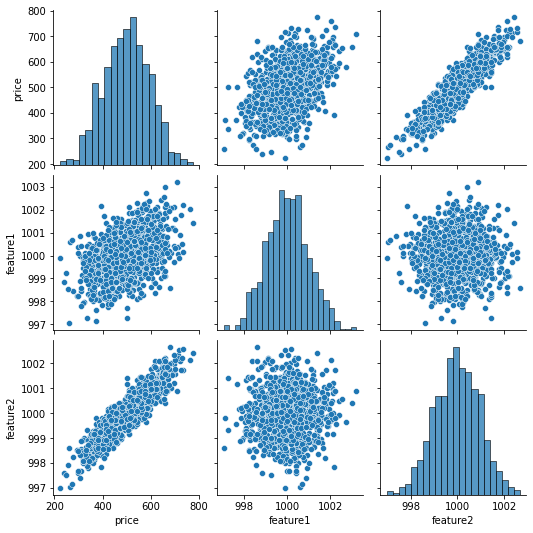

In [7]:
sns.pairplot(df)

In [8]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
y = df['price'].values
# y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
print(X_train.shape)
print(X_test.shape)

(700, 2)
(300, 2)


In [12]:
print(y_train.shape)
print(y_test.shape)

(700,)
(300,)


In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train = scaler.transform(X_train)
X_train

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [16]:
X_test = scaler.transform(X_test)
# X_test

In [17]:
import tensorflow as tf

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

## Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

  ### For a multi-class classification problem:
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

  ### For a binary classification problem:
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

  ### For a mean squared error regression problem:
    model.compile(optimizer='rmsprop', loss='mse')

In [19]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x=X_train, y=y_train, epochs=500)

Epoch 1/500
22/22 [==============================] - 1s 2ms/step - loss: 256899.4219
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 256788.8281
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 256702.0625
Epoch 4/500
22/22 [==============================] - 0s 2ms/step - loss: 256649.6875
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 256614.3750
Epoch 6/500
22/22 [==============================] - 0s 2ms/step - loss: 256580.7344
Epoch 7/500
22/22 [==============================] - 0s 2ms/step - loss: 256542.8281
Epoch 8/500
22/22 [==============================] - 0s 2ms/step - loss: 256498.1562
Epoch 9/500
22/22 [==============================] - 0s 2ms/step - loss: 256443.7969
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 256376.1094
Epoch 11/500
22/22 [==============================] - 0s 1ms/step - loss: 256290.1250
Epoch 12/500
22/22 [==============================] - 0s 2ms/st

In [21]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss
0,256899.421875
1,256788.828125
2,256702.062500
3,256649.687500
4,256614.375000
...,...
495,24.108011
496,23.912455
497,23.879866
498,23.907551


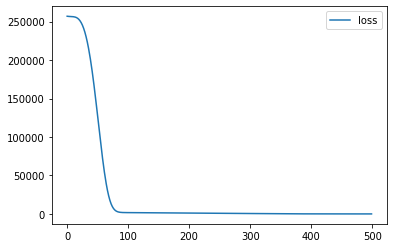

In [22]:
loss_df.plot() # Losses on the training set

## Predicting on Test set now:

In [23]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

print(training_score)
print(test_score)

23.8138427734375
25.11775016784668


In [24]:
test_predictions = model.predict(X_test)
test_predictions.shape

(300, 1)

In [25]:
prediction_df = pd.DataFrame(y_test, columns=['Test Y'])
prediction_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [26]:
test_predictions = pd.Series(test_predictions.reshape(300,))
test_predictions

0      405.698914
1      623.568787
2      592.160889
3      572.469727
4      367.332275
          ...    
295    529.345459
296    515.928772
297    609.677856
298    417.231476
299    411.366882
Length: 300, dtype: float32

In [27]:
prediction_df = pd.concat([prediction_df, test_predictions], axis=1)
prediction_df.columns = ['Test Y','Model Predictions']
prediction_df

,Test Y,Model Predictions
0,402.296319,405.698914
1,624.156198,623.568787
2,582.455066,592.160889
3,578.588606,572.469727
4,371.224104,367.332275
...,...,...
295,525.704657,529.345459
296,502.909473,515.928772
297,612.727910,609.677856
298,417.569725,417.231476


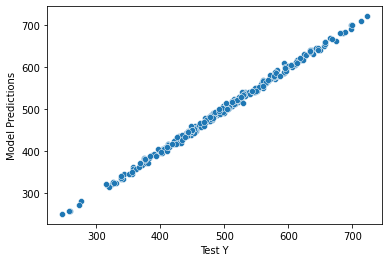

In [28]:
sns.scatterplot(x='Test Y', y='Model Predictions', data=prediction_df)

In [29]:
print(test_score ** .5) # Root-Mean Squared Error

5.011761184239197


## Saving and Loading the model:

In [30]:
from tensorflow.keras.models import load_model

In [31]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [32]:
later_model = load_model('my_model.h5')

## Predicting on brand new data:

In [33]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [34]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [35]:
new_gem = scaler.transform(new_gem)

In [36]:
later_model.predict(new_gem)

array([[420.29306]], dtype=float32)